<a href="https://colab.research.google.com/github/lizzzb/MovieLens-Data-Analysis-in-Python/blob/main/MovieLens_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MovieLens Data Analysis in Python


Import necessary libraries:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load MovieLens dataset (100K dataset from GroupLens): https://grouplens.org/datasets/movielens/100k/

In [6]:
import os
print(os.getcwd()) #working directory

/content


In [9]:
movies = pd.read_csv('u.item', sep='|', encoding='latin-1', header=None) # Reads 'u.item' using pipe (|) as separator, Latin-1 encoding, no header row

ratings = pd.read_csv('u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp']) # Reads 'u.data' using tab (\t) as separator, default encoding (likely UTF-8), with header row

users = pd.read_csv('u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

### 2. Explore the dataset (first few rows)

In [11]:
movies.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [15]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 3. Data Preprocessing

The MovieLens 100K dataset (u.item) has 24 fields, with 19 of them representing different genres as binary columns. The first 5 columns are metadata about the movie, and the remaining 19 columns are genre flags (0 or 1).

In [19]:
movies.columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL'] + [f'genre_{i}' for i in range(19)]
print("\nCleaned Movies Dataset:")
movies.head()


Cleaned Movies Dataset:


,movie_id,title,release_date,video_release_date,IMDb_URL,genre_0,genre_1,genre_2,genre_3,genre_4,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
# Merge datasets together (ratings + movies + users)
merged_data = pd.merge(pd.merge(ratings, users), movies)
print("\nMerged Dataset:")
merged_data.head()


Merged Dataset:


,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,release_date,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


1. **Nested `pd.merge()` calls:**
   - The code uses two nested `pd.merge()` calls to combine the `ratings`, `users`, and `movies` datasets into a single merged dataset.
   - The first `pd.merge()` merges the `ratings` and `users` datasets based on the common `user_id` column. This creates a new dataset with information about users and their ratings.
   - The second `pd.merge()` merges the result of the first merge with the `movies` dataset based on the common `movie_id` column. This results in the final merged dataset containing information about users, their ratings, and the corresponding movies.

2. **`merged_data` variable:**
   - The merged dataset is stored in the `merged_data` variable.

**Output:**

The output will display the first few rows of the merged dataset, showing columns like `user_id`, `movie_id`, `rating`, `timestamp`, `age`, `gender`, `occupation`, `zip_code`, and various columns from the `movies` dataset (depending on the specific content of the `movies` file).


### 4. Basic Analysis

In [23]:
# Average rating for each movie
movie_ratings = merged_data.groupby('title')['rating'].mean()
movie_ratings.head(10)

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


1. **`groupby('title')`:**
   - This part of the code groups the `merged_data` DataFrame by the 'title' column. This means that the data is organized into groups based on the unique movie titles.

2. **`['rating']`:**
   - This specifies that we are interested in the 'rating' column within each group.

3. **`.mean()`:**
   - This calculates the mean (average) value of the 'rating' column for each group (movie title).
  
You can sort the results by average rating using the sort_values() method: movie_ratings.sort_values(ascending=False).head(10).
To get more information about a specific movie, you can use the index to access its average rating: movie_ratings['Toy Story'].


In [67]:
movie_ratings.sort_values(ascending=False).head(10)

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
"Great Day in Harlem, A (1994)",5.0
Aiqing wansui (1994),5.0
Santa with Muscles (1996),5.0
Prefontaine (1997),5.0


In [29]:
movie_ratings['39 Steps, The (1935)']

4.0508474576271185

In [30]:
# Number of ratings for each movie
rating_count = merged_data.groupby('title')['rating'].count()
rating_count.head()

,rating
title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


In [58]:
rating_count.sort_values(ascending=False).head(20)

,rating
title,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485
"English Patient, The (1996)",481
Scream (1996),478
Toy Story (1995),452
Air Force One (1997),431


### 5. Visualize Movie Ratings

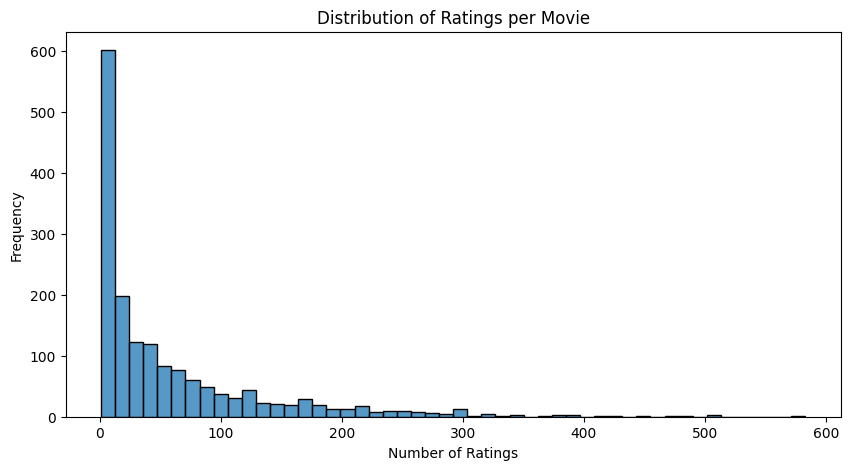

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(rating_count, bins=50)
plt.title("Distribution of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()

1. **`plt.figure(figsize=(10,5))`:**
   - This line creates a new figure for the plot with a width of 10 inches and a height of 5 inches. You can adjust these values to control the size of the plot.

2. **`sns.histplot(rating_count, bins=50)`:**
   - This line creates a histogram using the `sns.histplot` function from the Seaborn library.
   - `rating_count`: This is the data you want to visualize as a histogram. Assuming it's a DataFrame or Series containing the counts of ratings per movie.
   - `bins=50`: This argument specifies the number of bins to use in the histogram. More bins provide a smoother distribution, while fewer bins show a more coarse representation. You can experiment with different values to find the best fit for your data.
**Additional Notes:**

- You can customize the plot further by adjusting the color scheme, grid lines, legend, and other options provided by Matplotlib and Seaborn.
- If `rating_count` contains actual ratings (not counts), you'll need to modify the code to calculate the counts before plotting the histogram.

**Frequency** in the context of the histogram you described refers to the **number of occurrences** of a particular value or range of values within a dataset. In the case of your histogram, the frequency represents the **number of movies** that have a specific number of ratings.

**Where does it come from?**

The frequency data is typically derived from a **grouped dataset**. You used the `groupby` function in pandas to group the movies by their rating counts. This grouping creates a new dataset where each group represents a unique rating count, and the corresponding frequency is the number of movies within that group.

**Example:**

Imagine you have a dataset with 10 movies. If 3 movies have 5 ratings each, 2 movies have 10 ratings each, and 5 movies have 2 ratings each, the frequency distribution would look like this:

| Number of Ratings | Frequency |
|---|---|
| 2 | 5 |
| 5 | 3 |
| 10 | 2 |

### 6. Movie Recommendations (Collaborative Filtering)

A pivot table is a way to restructure data into a tabular format, making it easier to analyze and visualize.

The output will be a DataFrame where each row represents a user, each column represents a movie, and the values in the cells are the ratings given by that user to that movie. The pivot table will have missing values (NaN) where a user hasn't rated a particular movie.
You can use this pivot table for various tasks, such as calculating user-based or item-based collaborative filtering recommendations.


For more complex pivot table operations, you can explore additional arguments like aggfunc, fill_value, and margins.

In [42]:
# Create a pivot table of users and movie ratings
user_movie_matrix = merged_data.pivot_table(index='user_id', columns='title', values='rating')
user_movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [52]:
user_movie_matrix_filled = user_movie_matrix.fillna(0)

# Correlation matrix to find similarities between movies
correlations = user_movie_matrix.corr(method='pearson', min_periods=40)
correlations.head(30)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.000000,NaN,NaN,NaN,NaN,-0.043407,NaN,NaN,...,NaN,NaN,NaN,0.158840,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,0.096546,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Days in the Valley (1996),NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"20,000 Leagues Under the Sea (1954)",NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.259308,NaN,NaN,...,NaN,NaN,NaN,-0.096465,NaN,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey (1968),NaN,NaN,-0.043407,0.178848,NaN,NaN,0.259308,1.000000,NaN,0.367256,...,NaN,NaN,NaN,-0.001307,-0.174918,NaN,NaN,NaN,NaN,NaN
3 Ninjas: High Noon At Mega Mountain (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Example: Find similar movies to "Pulp Fiction (1994)"
star_wars_similar = correlations['Pulp Fiction (1994)'].dropna().sort_values(ascending=False)
print("\nMovies similar to 'Pulp Fiction (1994)':")
star_wars_similar.head(20)



Movies similar to 'Pulp Fiction (1994)':


,Pulp Fiction (1994)
title,
Pulp Fiction (1994),1.000000
Up in Smoke (1978),0.472877
"Cable Guy, The (1996)",0.472482
Swimming with Sharks (1995),0.456798
Trainspotting (1996),0.451906
Wallace & Gromit: The Best of Aardman Animation (1996),0.435902
Carlito's Way (1993),0.433845
Casino (1995),0.425864
Kalifornia (1993),0.422634


### User Recommendations

In [66]:
print(ratings.columns)

Index(['user_id', 'movie_id', 'rating', 'timestamp'], dtype='object')


.size() counts the number of occurrences (rows) for each group, regardless of the content of the rows.

It differs from .count(), which counts non-null entries for each column.

In [65]:
# Group by 'user_id' to count the number of ratings per user
user_ratings_count = ratings.groupby('user_id').size()  # Counts the number of ratings per user
user_ratings_count.head()

,0
user_id,
1,272
2,62
3,54
4,24
5,175


In [68]:
user_ratings_count.sort_values(ascending=False).head(10)

,0
user_id,
405,737
655,685
13,636
450,540
276,518
416,493
537,490
303,484
234,480


In [69]:
# Filter users with at least 10 ratings
active_users = user_ratings_count[user_ratings_count >= 10].index  # Get active users' indices

# Filter the ratings DataFrame to include only active users
filtered_ratings = ratings[ratings['user_id'].isin(active_users)]